# ***Telecom Churn Case Study***

### Importing Libraries

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import warnings
import time
from scipy import special 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import math
from IPython.display import Markdown, display ,HTML


from sklearn.model_selection import train_test_split


sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 1) # make sure data and columns are displayed correctly withput purge
pd.options.display.float_format = '{:20,.2f}'.format # display float value with correct precision 


warnings.filterwarnings('ignore')

### Importing the Dataset

In [2]:
# Reading the csv data file.
telecom_data = pd.read_csv("telecom_churn_data.csv")

In [3]:
# Displaying the first 10 field with all columns in the dataset
telecom_data.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,252.00,252.00,252.00,NaN,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.00,0.00,0.00,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.00,1.00,1.00,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.05,355.07,268.32,86.28,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,...,NaN,NaN,154.00,50.00,NaN,0.00,108.07,365.47,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.00,0.00,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.00,1.00,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.69,189.06,210.23,290.71,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,...,0.00,NaN,NaN,NaN,46.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.00,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.34,251.10,508.05,389.50,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.00,54.86,44.38,0.00,0.00,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.00,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.64,309.88,238.17,163.43,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.00,0.00,0.00,0.00,117.96,241.33,208.16,98.61,0.00,...,NaN,56.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.00,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
5,7000286308,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,50.26,58.81,83.39,170.83,50.16,43.63,85.48,138.79,19.28,13.4

In [4]:
# Checking the dimensions of the dataset
telecom_data.shape

(99999, 226)

In [5]:
# Checking the informations regarding the dataset
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

##### This telecom dataset has 99999 rows and 226 columns

### Checking the terms used in the data from data dictionary provided.

In [6]:
# Importing the excel file of the dictionary.
telecom_data_dict = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

In [7]:
# Displaying the dictionary items
telecom_data_dict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belongs to
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mobile to mobile)"
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


### Initial Statistical Analysis of the Data

In [8]:
# Statistical analysis of the numercial features
telecom_data.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,"99,999.00","7,001,207,270.39","695,669.39","7,000,000,074.00","7,000,606,232.50","7,001,204,632.00","7,001,812,030.50","7,002,410,905.00"
circle_id,"99,999.00",109.00,0.00,109.00,109.00,109.00,109.00,109.00
loc_og_t2o_mou,"98,981.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00
std_og_t2o_mou,"98,981.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00
loc_ic_t2o_mou,"98,981.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
aon,"99,999.00","1,219.85",954.73,180.00,467.00,863.00,"1,807.50","4,337.00"
aug_vbc_3g,"99,999.00",68.17,267.58,0.00,0.00,0.00,0.00,"12,916.22"
jul_vbc_3g,"99,999.00",66.84,271.20,0.00,0.00,0.00,0.00,"9,165.60"
jun_vbc_3g,"99,999.00",60.02,253.94,0.00,0.00,0.00,0.00,"11,166.21"


In [9]:
# lets check the columns unique values and drop such columns with its value as 1
unique_1_col=[]
for i in telecom_data.columns:
    if telecom_data[i].nunique() == 1:
        unique_1_col.append(i)
    else:
        pass

telecom_data.drop(unique_1_col, axis=1, inplace = True)
print("\n The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model\n",
      unique_1_col)


 The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [10]:
# The curent dimensions of the dataset
telecom_data.shape

(99999, 210)

In [11]:
# Checkng the overall missing values in the dataset
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

max_rech_data_6                   74.85
fb_user_6                         74.85
count_rech_3g_6                   74.85
count_rech_2g_6                   74.85
night_pck_user_6                  74.85
                           ...         
max_rech_amt_9                     0.00
max_rech_amt_8                     0.00
max_rech_amt_7                     0.00
max_rech_amt_6                     0.00
sep_vbc_3g                         0.00
Length: 210, dtype: float64

**As we can see that the columns with datetime values represented as object, they can be converted into datetime format**

In [12]:
# selecting all the columns with datetime format
date_col= telecom_data.select_dtypes(include=['object'])
print("\nThese are the columns available with datetime format represented as object\n",date_col.columns)

# Converting the selected columns to datetime format
for i in date_col.columns:
    telecom_data[i] = pd.to_datetime(telecom_data[i])

# Current dimension of the dataset
telecom_data.shape


These are the columns available with datetime format represented as object
 Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')


(99999, 210)

In [13]:
# confirming the conversion of dtype
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 210 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    mobile_number             int64         
 1    arpu_6                    float64       
 2    arpu_7                    float64       
 3    arpu_8                    float64       
 4    arpu_9                    float64       
 5    onnet_mou_6               float64       
 6    onnet_mou_7               float64       
 7    onnet_mou_8               float64       
 8    onnet_mou_9               float64       
 9    offnet_mou_6              float64       
 10   offnet_mou_7              float64       
 11   offnet_mou_8              float64       
 12   offnet_mou_9              float64       
 13   roam_ic_mou_6             float64       
 14   roam_ic_mou_7             float64       
 15   roam_ic_mou_8             float64       
 16   roam_ic_mou_9             float64     

### Handling missing values

#### Handling missing values of meaningful attribute column

In [14]:
# Handling missing values with respect to `data recharge` attributes
telecom_data[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head(10)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6
0,2014-06-21,1.00,252.00
1,NaT,NaN,NaN
2,NaT,NaN,NaN
3,NaT,NaN,NaN
4,2014-06-04,1.00,56.00
5,NaT,NaN,NaN
6,NaT,NaN,NaN
7,NaT,NaN,NaN
8,NaT,NaN,NaN
9,NaT,NaN,NaN


* Let us conside the column `date_of_last_rech_data` indicating the date of the last recharge made in any given month for mobile internet. Here it can deduced if the `total_rech_data` and the `max_rech_data` also has missing values, the missing values in all the columns mentioned can be considered as meaningful missing.<br> 
* Hence imputing 0 as their values.<br>
* Meaningfull missing in this case represents the the customer has not done any recharge for mobile interenet.

#### Handling the missing values for the attributes `total_rech_data_*`, `max_rech_data_*` and for month 6,7,8 and 9

In [18]:
# Code for conditional imputation
start_time=time.time()
for i in range(len(telecom_data)):
  # Handling 'total_rech_data', 'max_rech_data' and for month 6
    if pd.isnull((telecom_data['total_rech_data_6'][i]) and (telecom_data['max_rech_data_6'][i])):
        if pd.isnull(telecom_data['date_of_last_rech_data_6'][i]):
            telecom_data['total_rech_data_6'][i]=0
            telecom_data['max_rech_data_6'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 7
    if pd.isnull((telecom_data['total_rech_data_7'][i]) and (telecom_data['max_rech_data_7'][i])):
        if pd.isnull(telecom_data['date_of_last_rech_data_7'][i]):
            telecom_data['total_rech_data_7'][i]=0
            telecom_data['max_rech_data_7'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 8
    if pd.isnull((telecom_data['total_rech_data_8'][i]) and (telecom_data['max_rech_data_8'][i])):
        if pd.isnull(telecom_data['date_of_last_rech_data_8'][i]):
            telecom_data['total_rech_data_8'][i]=0
            telecom_data['max_rech_data_8'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 9
    if pd.isnull((telecom_data['total_rech_data_9'][i]) and (telecom_data['max_rech_data_9'][i])):
        if pd.isnull(telecom_data['date_of_last_rech_data_9'][i]):
            telecom_data['total_rech_data_9'][i]=0
            telecom_data['max_rech_data_9'][i]=0

end_time = time.time()
print("\nExecution Time = ", round(end_time-start_time,2),"seconds")
print("The columns \n'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'\n'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9' are imputed with 0 based on the condition explained above")


Execution Time =  12.57 seconds
The columns 
'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'
'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9' are imputed with 0 based on the condition explained above


#### Handling the missing values for the attributes `count_rech_2g_*`,`count_rech_3g_*` for month 6,7,8 and 9

In [19]:
# Checking the related columns values
telecom_data[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head(10)

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,0.00,1.00,1.00
1,NaN,NaN,0.00
2,NaN,NaN,0.00
3,NaN,NaN,0.00
4,1.00,0.00,1.00
5,NaN,NaN,0.00
6,NaN,NaN,0.00
7,NaN,NaN,0.00
8,NaN,NaN,0.00
9,NaN,NaN,0.00


*From the above tablular the column values of `total_rech_data` for each month from 6 to 9 respectively is the sum of the columns values of `count_rech_2g` for each month from 6 to 9 respectively and `count_rech_3g` for each month from 6 to 9 respectively, which derives to a multicollinearity issue. In order to reduce the multicollinearity, we can drop the columns `count_rech_2g` for each month from 6 to 9 respectively and `count_rech_3g` for each month from 6 to 9 respectively.*

In [20]:
# Dropping the columns 'count_rech_2g_*' & 'count_rech_3g_*' for the months 6,7,8 and 9 
telecom_data.drop(['count_rech_2g_6','count_rech_3g_6',
                   'count_rech_2g_7','count_rech_3g_7',
                   'count_rech_2g_8','count_rech_3g_8',
                   'count_rech_2g_9','count_rech_3g_9'],axis=1, inplace=True)

print("The 'count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9' columns are dropped as they can be explained from the 'total_rech_data'column")

The 'count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9' columns are dropped as they can be explained from the 'total_rech_data'column


In [21]:
# The curent dimensions of the dataset
telecom_data.shape

(99999, 202)

#### Handling the missing values for the attributes `arpu_3g_*`,`arpu_2g_*` for month 6,7,8 and 9

In [22]:
# Checking the related columns values
telecom_data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].head(10)

,arpu_3g_6,arpu_2g_6,av_rech_amt_data_6
0,212.17,212.17,252.00
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,0.00,0.00,56.00
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [23]:
# Checking the correlation between the above mentioned columns in tabular for months 6,7,8 and 9
print("Correlation table for month 6\n\n", telecom_data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print("\nCorrelation table for month 7\n\n", telecom_data[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nCorrelation table for month 8\n\n", telecom_data[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())
print("\nCorrelation table for month 9\n\n", telecom_data[['arpu_3g_9','arpu_2g_9','av_rech_amt_data_9']].corr())

Correlation table for month 6

                               arpu_3g_6            arpu_2g_6  \
arpu_3g_6                          1.00                 0.93   
arpu_2g_6                          0.93                 1.00   
av_rech_amt_data_6                 0.81                 0.83   

                     av_rech_amt_data_6  
arpu_3g_6                          0.81  
arpu_2g_6                          0.83  
av_rech_amt_data_6                 1.00  

Correlation table for month 7

                               arpu_3g_7            arpu_2g_7  \
arpu_3g_7                          1.00                 0.93   
arpu_2g_7                          0.93                 1.00   
av_rech_amt_data_7                 0.80                 0.82   

                     av_rech_amt_data_7  
arpu_3g_7                          0.80  
arpu_2g_7                          0.82  
av_rech_amt_data_7                 1.00  

Correlation table for month 8

                               arpu_3g_8            a

From the above correlation table between attributes `arpu_2g_*` and `arpu_3g_*` for each month from 6 to 9 respectively is highly correlated to the attribute `av_rech_amt_data_*` for each month from 6 to 9 respectively.<br> Considering the high correlation between them, it is safer to drop the attributes `arpu_2g_*` and `arpu_3g_*`.

In [24]:
# Dropping the columns 'arpu_3g_*'&'arpu_2g_*' in month 6,7,8 and 9 datafrom the dataset
telecom_data.drop(['arpu_3g_6','arpu_2g_6',
                  'arpu_3g_7','arpu_2g_7',
                  'arpu_3g_8','arpu_2g_8',
                  'arpu_3g_9','arpu_2g_9'],axis=1, inplace=True)
print("\nThe columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9' are dropped from the dataset due to high corellation between their respective arpu_* variable in the dataset\n")



The columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9' are dropped from the dataset due to high corellation between their respective arpu_* variable in the dataset



In [25]:
# The curent dimensions of the dataset
telecom_data.shape

(99999, 194)

#### Handling the other attributes with higher missing value percentage

The column `fb_user_*` and `night_pck_user_*` for each month from 6 to 9 respectively has a missing values above 50% and does not seem to add any information to understand the data. Hence we can drop these columns for further analysis.

In [26]:
telecom_data.drop(['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
                  'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9'],
                  axis=1, inplace=True)
print("\nThe columns 'fb_user_6','fb_user_7','fb_user_8','fb_user_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9' are dropped from the dataset as it has no meaning to the data snd has high missing values above 50%\n")


The columns 'fb_user_6','fb_user_7','fb_user_8','fb_user_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9' are dropped from the dataset as it has no meaning to the data snd has high missing values above 50%



In [27]:
# The curent dimensions of the dataset
telecom_data.shape

(99999, 186)

#### Handling the missing values for the attributes `av_rech_amt_data_*` for month 6,7,8 and 9

In [28]:
# Checking the related columns values
telecom_data[['av_rech_amt_data_7','max_rech_data_7','total_rech_data_7']].head(10)

,av_rech_amt_data_7,max_rech_data_7,total_rech_data_7
0,252.00,252.00,1.00
1,154.00,154.00,1.00
2,NaN,0.00,0.00
3,NaN,0.00,0.00
4,NaN,0.00,0.00
5,NaN,0.00,0.00
6,NaN,0.00,0.00
7,NaN,0.00,0.00
8,177.00,154.00,2.00
9,154.00,154.00,1.00


From the above tabular it is deduced that the missing values for the column `av_rech_amt_data_*` for each month from 6 to 9 can be replaced as 0 if the `total_rech_data_*` for each month from 6 to 9 respectively is 0. i.e. if the total recharge done is 0 then the average recharge amount shall also be 0.

In [29]:
# Code for conditional imputation
start_time = time.time()
for i in range(len(telecom_data)):
  # Handling `av_rech_amt_data`  for month 6
    if (pd.isnull(telecom_data['av_rech_amt_data_6'][i]) and (telecom_data['total_rech_data_6'][i]==0)):
        telecom_data['av_rech_amt_data_6'][i] = 0

  # Handling `av_rech_amt_data`  for month 7
    if (pd.isnull(telecom_data['av_rech_amt_data_7'][i]) and (telecom_data['total_rech_data_7'][i]==0)):
        telecom_data['av_rech_amt_data_7'][i] = 0

  # Handling `av_rech_amt_data`  for month 8
    if (pd.isnull(telecom_data['av_rech_amt_data_8'][i]) and (telecom_data['total_rech_data_8'][i]==0)):
        telecom_data['av_rech_amt_data_8'][i] = 0

  # Handling `av_rech_amt_data`  for month 9
    if (pd.isnull(telecom_data['av_rech_amt_data_9'][i]) and (telecom_data['total_rech_data_9'][i]==0)):
        telecom_data['av_rech_amt_data_9'][i] = 0


end_time=time.time()
print("\nExecution Time = ", round(end_time-start_time,2),"seconds")
print("\nThe columns 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8' and 'av_rech_amt_data_9' are imputed with 0 based on the condition explained above\n")


Execution Time =  297.53 seconds

The columns 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8' and 'av_rech_amt_data_9' are imputed with 0 based on the condition explained above



In [30]:
# Checkng the overall missing values in the dataset
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

date_of_last_rech_data_6                  74.85
date_of_last_rech_data_7                  74.43
date_of_last_rech_data_9                  74.08
date_of_last_rech_data_8                  73.66
og_others_9                                7.75
                                   ...         
max_rech_amt_7                             0.00
max_rech_amt_6                             0.00
total_rech_amt_9                           0.00
total_rech_amt_8                           0.00
sep_vbc_3g                                 0.00
Length: 186, dtype: float64

In [31]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(144), int64(34)
memory usage: 141.9 MB


<br><br>From the above results, we can conclude, the `date_of_last_rech_data_*` corresponding to months 6,7,8 and 9 are of no value after the conditional imputation of of columns `total_rech_data_*`,` max_rech_data_*`are completes.<br>Also the missing value percentage is high for these columns and can be dropped from the dataset.

In [32]:
# Dropping the columns related to datetime dtype from the dataset
telecom_data.drop(["date_of_last_rech_data_6","date_of_last_rech_data_7",
                   "date_of_last_rech_data_8","date_of_last_rech_data_9"], axis=1, inplace=True)
print("\nThe columns 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9' are dropped as it has no significance to the data\n")


The columns 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9' are dropped as it has no significance to the data



**As we can no more utilise the datetime column, we can drop the `date_of_last_rech_data_*` column corresponding to months 6,7,8 and 9 respectively.**

In [33]:
# Dropping the columns related to datetime dtype from the dataset
telecom_data.drop(["date_of_last_rech_6","date_of_last_rech_7",
                   "date_of_last_rech_8","date_of_last_rech_9"], axis=1, inplace=True)
print("\nThe columns 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9' are dropped as it has no significance to the data\n")


The columns 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9' are dropped as it has no significance to the data



In [34]:
# The curent dimensions of the dataset
telecom_data.shape

(99999, 178)

***Since the columns used to determine the High Value Customer is clear of null values, we can filter the overall data and then handle the remaining missing values for each column***

### Filtering the High Value Customer from Good Phase

In [35]:
# Filtering the data 
 # We are filtering the data in accordance to total revenue generated per customer.

 # first we need the total amount recharge amount done for data alone, we have average rechage amount done. 

 # Calculating the total recharge amount done for data alone in months 6,7,8 and 9
telecom_data['total_rech_amt_data_6']=telecom_data['av_rech_amt_data_6'] * telecom_data['total_rech_data_6']
telecom_data['total_rech_amt_data_7']=telecom_data['av_rech_amt_data_7'] * telecom_data['total_rech_data_7']

# Calculating the overall recharge amount for the months 6,7,8 and 9
telecom_data['overall_rech_amt_6'] = telecom_data['total_rech_amt_data_6'] + telecom_data['total_rech_amt_6']
telecom_data['overall_rech_amt_7'] = telecom_data['total_rech_amt_data_7'] + telecom_data['total_rech_amt_7']

# Calculating the average recharge done by customer in months June and July(i.e. 6th and 7th month)
telecom_data['avg_rech_amt_6_7'] = (telecom_data['overall_rech_amt_6'] + telecom_data['overall_rech_amt_7'])/2

# Finding the value of 70th percentage in the overall revenues defining the high value customer creteria for the company
cut_off = telecom_data['avg_rech_amt_6_7'].quantile(0.70)
print("\nThe 70th quantile value to determine the High Value Customer is: ",cut_off,"\n")

# Filtering the data to the top 30% considered as High Value Customer
telecom_data = telecom_data[telecom_data['avg_rech_amt_6_7'] >= cut_off]


The 70th quantile value to determine the High Value Customer is:  478.0 



In [36]:
# The curent dimension of the dataset
telecom_data.shape

(30001, 183)

The total number of customers is now limited to ~30k who lies under the High Value customer criteria basen upon which the model is built. 

In [37]:
# Let us check the missing values percentages again for the HVC group
    # Checkng the overall missing values in the dataset
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

loc_ic_t2f_mou_9                   6.34
spl_og_mou_9                       6.34
loc_og_t2m_mou_9                   6.34
loc_og_t2f_mou_9                   6.34
loc_ic_t2t_mou_9                   6.34
                           ...         
max_rech_amt_8                     0.00
max_rech_amt_7                     0.00
max_rech_amt_6                     0.00
total_rech_amt_9                   0.00
avg_rech_amt_6_7                   0.00
Length: 183, dtype: float64

*** The remaining attributes with missing value can be imputed using the advanced imputation technique like `KNNImputer`.***

In [38]:
# Numerical columns available
num_col = telecom_data.select_dtypes(include = ['int64','float64']).columns.tolist()

In [39]:
# Importing the libraries for Scaling and Imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Calling the Scaling function
scalar = MinMaxScaler()

# Scaling and transforming the data for the columns that are numerical
telecom_data[num_col]=scalar.fit_transform(telecom_data[num_col])

# Calling the KNN Imputer function
knn=KNNImputer(n_neighbors=3)

# Imputing the NaN values using KNN Imputer
start_time=time.time()

telecom_data_knn = pd.DataFrame(knn.fit_transform(telecom_data[num_col]))
telecom_data_knn.columns=telecom_data[num_col].columns

end_time=time.time()
print("\nExecution Time = ", round(end_time-start_time,2),"seconds\n")


Execution Time =  255.37 seconds



In [40]:
# check for any null values after imputation for numerical columns
telecom_data_knn.isnull().sum().sum()

0

The KNN Imputer has replaced all the null values in the numerical column usingK-means algorithm sucessfully

In [41]:
# Since we sclaed the numerical columns for the purpose of handling the null values, 
    #we can restore the sclaed alues to its original form.

# Converting the scaled data back to the original data
telecom_data[num_col]=scalar.inverse_transform(telecom_data_knn)

# Checking the top 10 data
telecom_data.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,...,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
0,"7,000,842,753.00",197.38,214.82,213.80,21.10,53.27,24.61,0.00,33.59,84.23,23.99,0.00,27.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.61,0.00,33.21,79.27,18.20,0.00,24.19,0.40,4.81,0.00,2.69,0.35,0.00,0.00,0.24,132.95,47.64,0.00,60.10,0.00,0.00,0.00,0.38,0.41,0.98,0.00,0.94,0.00,...,252.00,252.00,252.00,0.00,1.00,1.00,1.00,0.00,252.00,252.00,252.00,0.00,252.00,252.00,252.00,0.00,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,968.00,30.40,0.00,101.20,3.58,252.00,252.00,614.00,504.00,559.00
7,"7,000,701,601.00","1,069.18","1,349.85","3,171.48",500.00,57.84,54.68,52.29,65.28,453.43,567.16,325.91,172.05,16.23,33.49,31.64,4.78,23.74,12.59,38.06,7.88,51.39,31.38,40.28,43.38,308.63,447.38,162.28,100.19,62.13,55.14,53.23,4.03,0.00,0.00,0.00,0.00,422.16,533.91,255.79,147.60,4.30,23.29,12.01,21.90,49.89,31.76,49.14,2.53,6.66,...,0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,0.00,0.00,0.00,"1,580.00",790.00,"1,185.00"
8,"7,001,524,846.00",378.72,492.22,137.36,166.79,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,...,50.00,0.00,10.00,0.00,0.00,2.00,3.00,0.00,0.00,154.00,23.00,0.00,0.00,177.00,69.00,0.00,0.00,356.00,0.03,0.00,0.00,750.95,11.94,0.00,0.00,1.00,0.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,910.65,122.16,0.00,0.00,354.00,437.00,955.00,696.00
21,"7,002,124,215.00",514.45,597.75,637.76,578.60,102.41,132.11,85.14,161.63,757.93,896.68,983.39,869.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,29.98,91.81,87.93,104.81,107.54,0.75,0.00,1.58,0.00,0.00,0.00,0.00,0.00,97.04,94.09,129.74,137.53,97.93,125.94,61.79,131.64,665.36,808.74,876.99,762.34,0.00,...,30.00,20.00,50.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,720.00,0.00,0.00,0.00,0.00,0.00,0.00,600.00,680.00,640.00
23,"7,000,887,461.00",74.35,193.90,366.97,811.48,48.96,50.66,33.58,15.74,85.41,89.36,205.89,111.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,15.74,82.

In [42]:
# Checking the overall missing values in the dataset
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

mobile_number                      0.00
isd_ic_mou_8                       0.00
ic_others_6                        0.00
ic_others_7                        0.00
ic_others_8                        0.00
                           ...         
spl_og_mou_8                       0.00
spl_og_mou_9                       0.00
og_others_6                        0.00
og_others_7                        0.00
avg_rech_amt_6_7                   0.00
Length: 183, dtype: float64

In [43]:
# Reconfirming for missing values if any
telecom_data.isnull().sum().sum()

0

### ***Defining Churn  variable***


As explained above in the introduction, we are deriving based on usage based for this model.

For that, we need to find the derive churn variable using `total_ic_mou_9`,`total_og_mou_9`,`vol_2g_mb_9` and `vol_3g_mb_9` attributes

In [44]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
telecom_data[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [45]:
# Initializing the churn variable.
telecom_data['churn']=0

# Imputing the churn values based on the condition
telecom_data['churn'] = np.where(telecom_data[churn_col].sum(axis=1) == 0, 1, 0)

In [46]:
# Checking the top 10 data
telecom_data.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,...,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn
0,"7,000,842,753.00",197.38,214.82,213.80,21.10,53.27,24.61,0.00,33.59,84.23,23.99,0.00,27.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.61,0.00,33.21,79.27,18.20,0.00,24.19,0.40,4.81,0.00,2.69,0.35,0.00,0.00,0.24,132.95,47.64,0.00,60.10,0.00,0.00,0.00,0.38,0.41,0.98,0.00,0.94,0.00,...,252.00,252.00,0.00,1.00,1.00,1.00,0.00,252.00,252.00,252.00,0.00,252.00,252.00,252.00,0.00,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,968.00,30.40,0.00,101.20,3.58,252.00,252.00,614.00,504.00,559.00,1
7,"7,000,701,601.00","1,069.18","1,349.85","3,171.48",500.00,57.84,54.68,52.29,65.28,453.43,567.16,325.91,172.05,16.23,33.49,31.64,4.78,23.74,12.59,38.06,7.88,51.39,31.38,40.28,43.38,308.63,447.38,162.28,100.19,62.13,55.14,53.23,4.03,0.00,0.00,0.00,0.00,422.16,533.91,255.79,147.60,4.30,23.29,12.01,21.90,49.89,31.76,49.14,2.53,6.66,...,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,0.00,0.00,0.00,"1,580.00",790.00,"1,185.00",1
8,"7,001,524,846.00",378.72,492.22,137.36,166.79,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,...,0.00,10.00,0.00,0.00,2.00,3.00,0.00,0.00,154.00,23.00,0.00,0.00,177.00,69.00,0.00,0.00,356.00,0.03,0.00,0.00,750.95,11.94,0.00,0.00,1.00,0.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,910.65,122.16,0.00,0.00,354.00,437.00,955.00,696.00,0
21,"7,002,124,215.00",514.45,597.75,637.76,578.60,102.41,132.11,85.14,161.63,757.93,896.68,983.39,869.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,29.98,91.81,87.93,104.81,107.54,0.75,0.00,1.58,0.00,0.00,0.00,0.00,0.00,97.04,94.09,129.74,137.53,97.93,125.94,61.79,131.64,665.36,808.74,876.99,762.34,0.00,...,20.00,50.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,720.00,0.00,0.00,0.00,0.00,0.00,0.00,600.00,680.00,640.00,0
23,"7,000,887,461.00",74.35,193.90,366.97,811.48,48.96,50.66,33.58,15.74,85.41,89.36,205.89,111.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,15.74,82.94,83.01,148.56,83.73,0.00,0.

0                  91.86
1                   8.14
Name: churn, dtype: float64


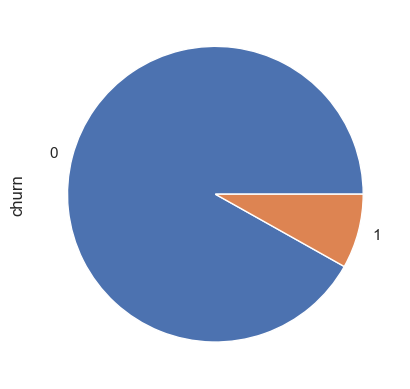

In [47]:
# lets find out churn/non churn percentage
print((telecom_data['churn'].value_counts()/len(telecom_data))*100)
((telecom_data['churn'].value_counts()/len(telecom_data))*100).plot(kind="pie")
plt.show()

#### ***As we can see that 91% of the customers do not churn, there is a possibility of class imbalance*** <br>

Since this variable `churn` is the target variable, all the columns relating to this variable(i.e. all columns with suffix `_9`) can be dropped forn the dataset.

In [48]:
# Selecting all the churn phase columns in order to drop then

churn_phase_cols = [col for col in telecom_data.columns if '_9' in col]
print("The columns from churn phase are:\n",churn_phase_cols)

The columns from churn phase are:
 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [49]:
# Dropping the selected churn phase columns
telecom_data.drop(churn_phase_cols, axis=1, inplace=True)

# The curent dimension of the dataset after dropping the churn related columns
telecom_data.shape

(30001, 141)

We can still clean the data by few possible columns relating to the good phase.

As we derived few columns in the good phase earlier, we can drop those related columns during creation.



In [50]:
# telecom_data['total_rech_amt_data_6']=telecom_data['av_rech_amt_data_6'] * telecom_data['total_rech_data_6']
# telecom_data['total_rech_amt_data_7']=telecom_data['av_rech_amt_data_7'] * telecom_data['total_rech_data_7']

# # Calculating the overall recharge amount for the months 6,7,8 and 9
# telecom_data['overall_rech_amt_6'] = telecom_data['total_rech_amt_data_6'] + telecom_data['total_rech_amt_6']
# telecom_data['overall_rech_amt_7'] = telecom_data['total_rech_amt_data_7'] + telecom_data['total_rech_amt_7']

telecom_data.drop(['total_rech_amt_data_6','av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'total_rech_amt_data_7','av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

*We can also create new columns for the defining the good phase variables and drop the seperate 6th and 7 month variables.*

<br>**Before proceding to check the remaining missing value handling, let us check the collineartity of the indepedent variables and try to understand their dependencies.**<br>

In [51]:
# creating a list of column names for each month
mon_6_cols = [col for col in telecom_data.columns if '_6' in col]
mon_7_cols = [col for col in telecom_data.columns if '_7' in col]
mon_8_cols = [col for col in telecom_data.columns if '_8' in col]

In [61]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
telecom_data_corr = telecom_data.corr()
telecom_data_corr.loc[:,:] = np.tril(telecom_data_corr, k=-1)
telecom_data_corr = telecom_data_corr.stack()
telecom_data_corr
telecom_data_corr[(telecom_data_corr > 0.80) | (telecom_data_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8    arpu_8                               0.96
isd_og_mou_8        isd_og_mou_7                         0.94
                    isd_og_mou_6                         0.92
isd_og_mou_7        isd_og_mou_6                         0.92
sachet_2g_8         total_rech_data_8                    0.90
total_ic_mou_6      loc_ic_mou_6                         0.90
total_ic_mou_8      loc_ic_mou_8                         0.89
total_ic_mou_7      loc_ic_mou_7                         0.88
std_og_t2t_mou_8    onnet_mou_8                          0.86
std_og_t2t_mou_7    onnet_mou_7                          0.86
std_og_t2t_mou_6    onnet_mou_6                          0.86
avg_rech_amt_6_7    overall_rech_amt_7                   0.86
std_og_t2m_mou_7    offnet_mou_7                         0.85
std_og_t2m_mou_8    offnet_mou_8                         0.85
total_og_mou_8      std_og_mou_8                         0.85
total_og_mou_7      std_og_mou_7                         0.85
loc_ic_m

In [52]:
col_to_drop=['total_rech_amt_8','isd_og_mou_8','isd_og_mou_7','sachet_2g_8','total_ic_mou_6',
            'total_ic_mou_8','total_ic_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_8','std_og_t2t_mou_7',
            'std_og_t2m_mou_7','std_og_t2m_mou_8',]

# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

#  dropping these column
telecom_data.drop(col_to_drop, axis=1, inplace=True)

In [53]:
# The curent dimension of the dataset after dropping few unwanted columns
telecom_data.shape

(30001, 121)

### Deriving new variables to understand the data


In [54]:
# We have a column called 'aon'

# we can derive new variables from this to explain the data w.r.t churn.

# creating a new variable 'tenure'
telecom_data['tenure'] = (telecom_data['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
telecom_data.drop('aon',axis=1, inplace=True)

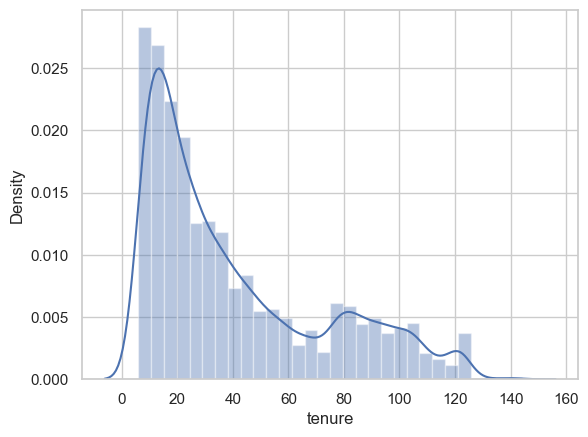

In [55]:
# Checking the distribution of he tenure variable

sns.distplot(telecom_data['tenure'],bins=30)
plt.show()

In [56]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_data['tenure_range'] = pd.cut(telecom_data['tenure'], tn_range, labels=tn_label)
telecom_data['tenure_range'].head()

0     2-5 Yrs    
7     2-5 Yrs    
8     6-12 Months
21    1-2 Yrs    
23    1-2 Yrs    
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

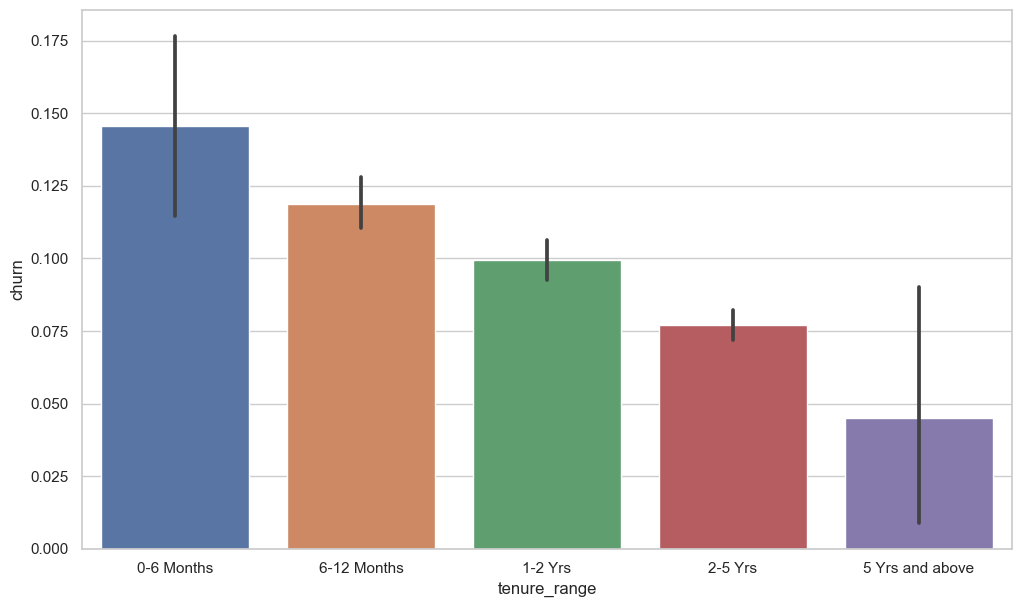

In [57]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=telecom_data)
plt.show()

**It can be seen that the maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network.**

The average revenue per user is good phase of customer is given by arpu_6 and arpu_7. since we have two seperate averages, lets take an average to these two and drop the other columns.

In [58]:
telecom_data["avg_arpu_6_7"]= (telecom_data['arpu_6']+telecom_data['arpu_7'])/2
telecom_data['avg_arpu_6_7'].head()

0                  206.10
7                1,209.51
8                  435.47
21                 556.10
23                 134.12
Name: avg_arpu_6_7, dtype: float64

In [59]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data

telecom_data.drop(['arpu_6','arpu_7'], axis=1, inplace=True)


# The curent dimension of the dataset after dropping few unwanted columns
telecom_data.shape

(30001, 121)

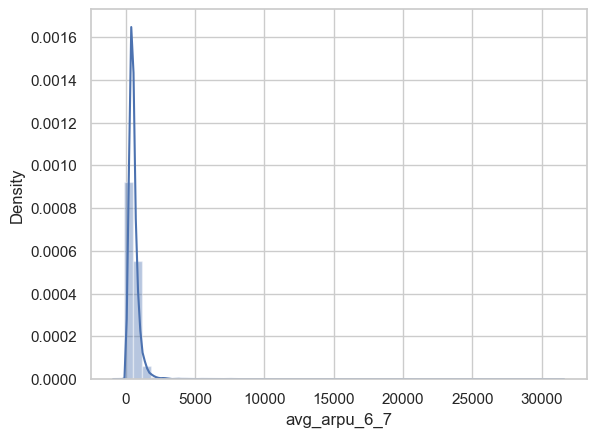

In [60]:
# Visualizing the column created
sns.distplot(telecom_data['avg_arpu_6_7'])
plt.show()

Text(0.5, 1.0, 'Features Correlating with Churn variable')

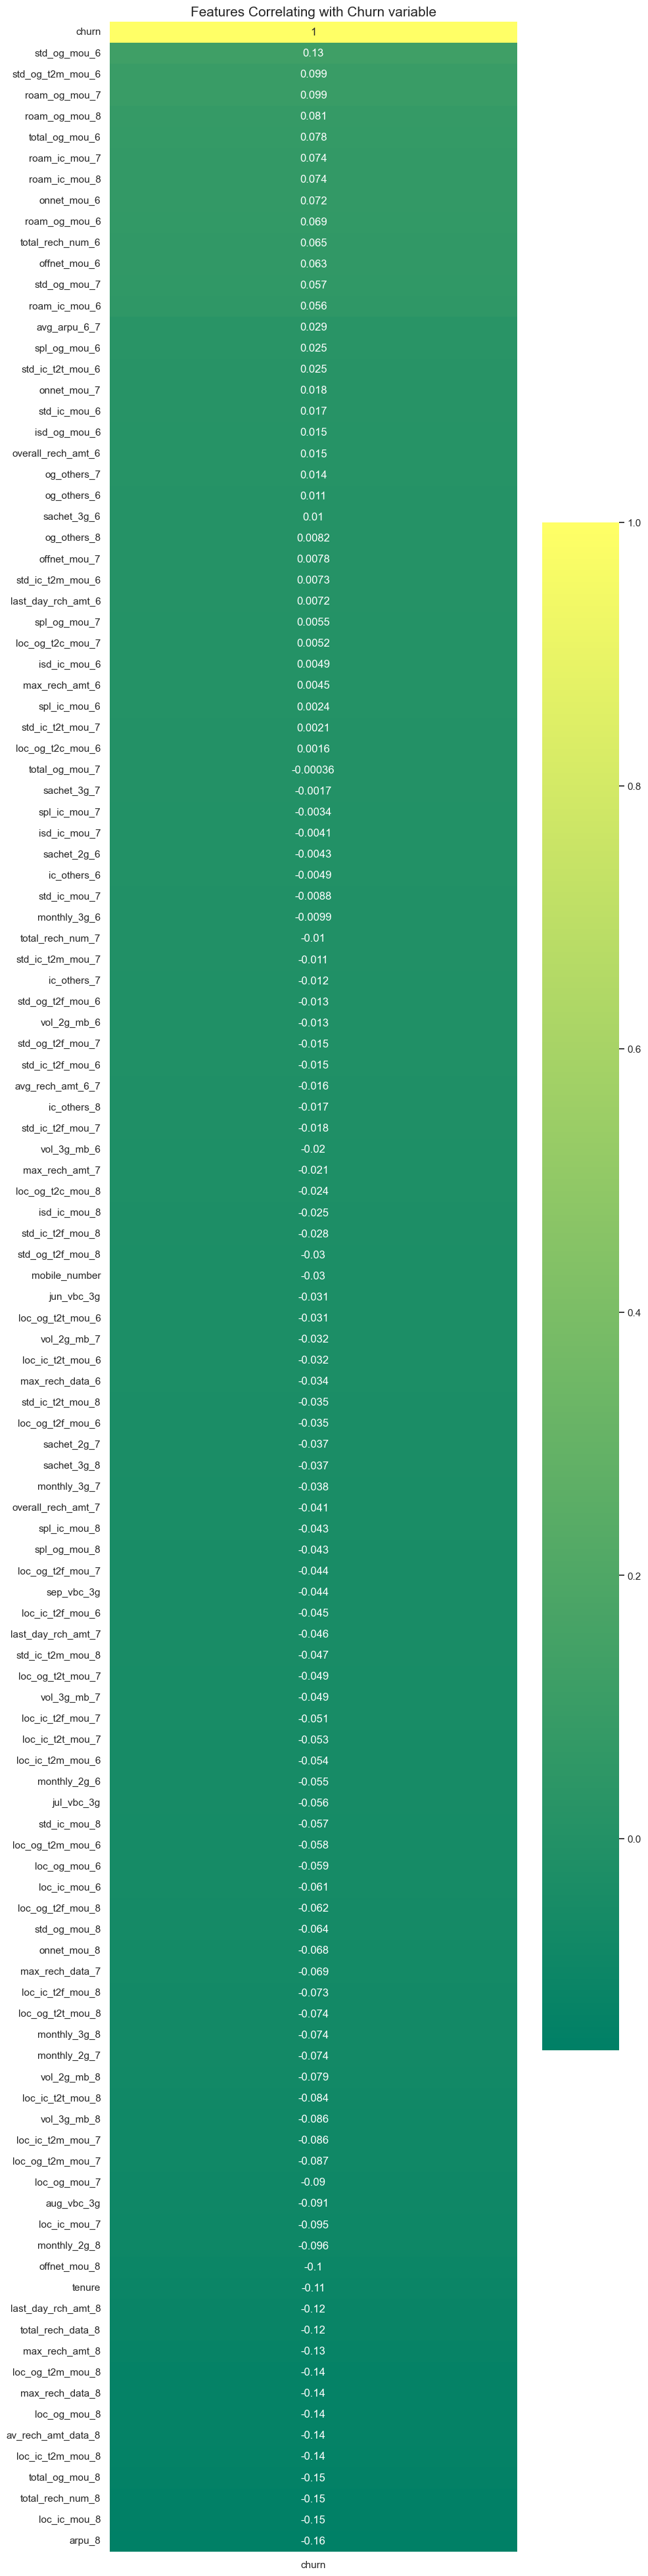

In [61]:
# Checking Correlation between target variable(SalePrice) with the other variable in the dataset
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(telecom_data.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)


- Avg Outgoing Calls & calls on romaning for 6 & 7th months are positively correlated with churn.
- Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

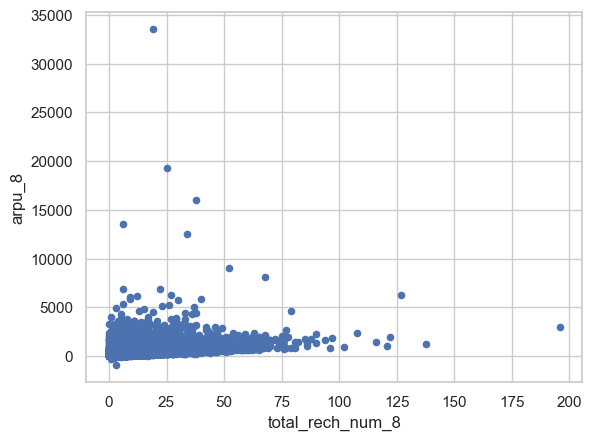

In [62]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
telecom_data[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

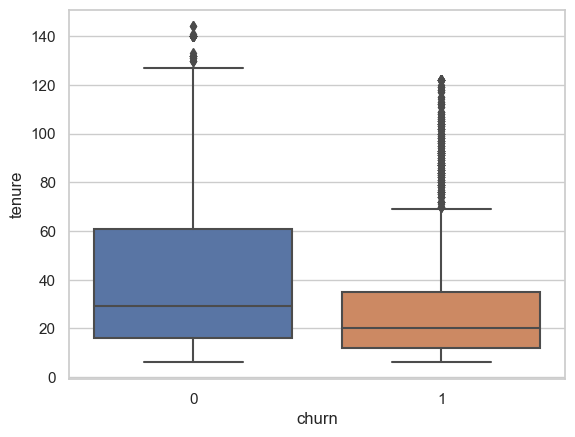

In [63]:
sns.boxplot(x = telecom_data.churn, y = telecom_data.tenure)

plt.show()

**From the above plot , its clear tenured customers do no churn and they keep availing telecom services**

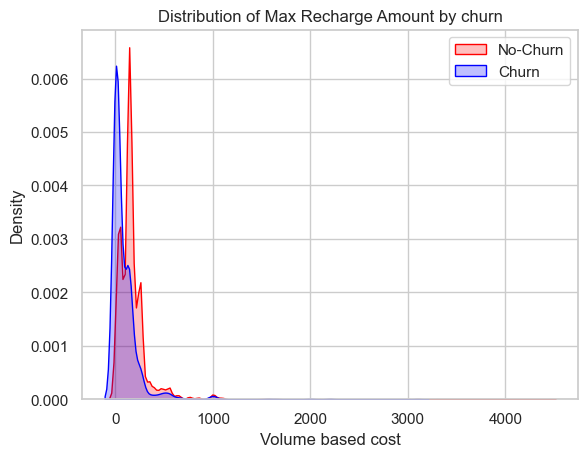

In [64]:
# Plot between churn vs max rechare amount
ax = sns.kdeplot(telecom_data.max_rech_amt_8[(telecom_data["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_data.max_rech_amt_8[(telecom_data["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

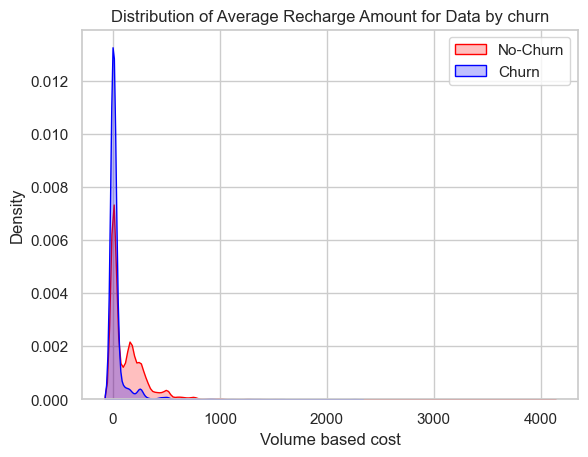

In [65]:
# churn vs max rechare amount
ax = sns.kdeplot(telecom_data.av_rech_amt_data_8[(telecom_data["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_data.av_rech_amt_data_8[(telecom_data["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Average Recharge Amount for Data by churn')
plt.show()

In [68]:
# Creating categories for month 8 column totalrecharge and their count
telecom_data['total_rech_data_group_8']=pd.cut(telecom_data['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
telecom_data['total_rech_num_group_8']=pd.cut(telecom_data['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

					Distribution of total_rech_data_8 variable
 <=10_Recharges     15307
No_Recharge        14048
10-25_Recharges    608  
>25_Recharges      38   
Name: total_rech_data_group_8, dtype: int64


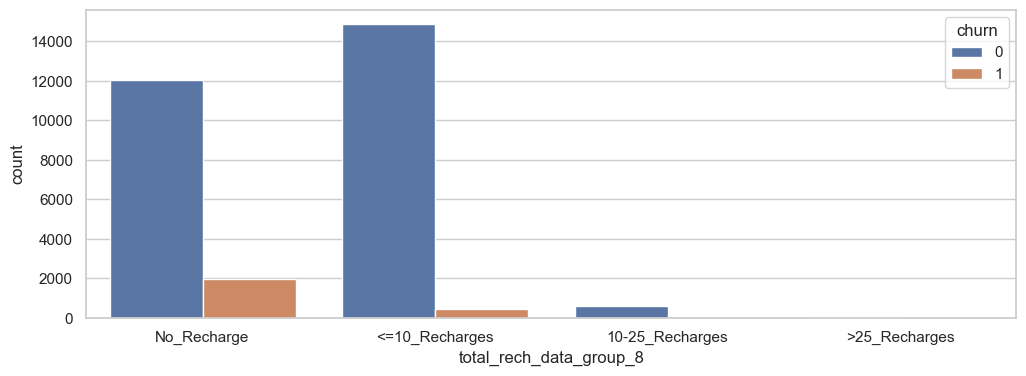

					Distribution of total_rech_num_8 variable
 <=10_Recharges     19349
10-25_Recharges    8073 
>25_Recharges      1996 
No_Recharge        583  
Name: total_rech_num_group_8, dtype: int64


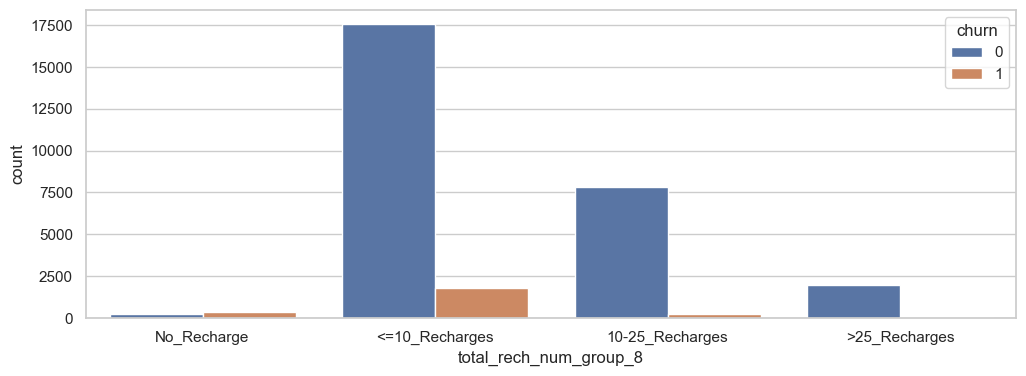

In [69]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=telecom_data,x="total_rech_data_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",telecom_data['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=telecom_data,x="total_rech_num_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",telecom_data['total_rech_num_group_8'].value_counts())
plt.show()

As the number of recharge rate increases, the churn rate decreases clearly.

In [70]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(telecom_data[['total_rech_data_group_8','total_rech_num_group_8','tenure_range']], drop_first=True)
dummy.head()

,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,1,0,0,1,0,0,0,0,1,0
7,0,0,0,1,0,0,0,0,1,0
8,1,0,0,0,1,0,1,0,0,0
21,0,0,0,0,0,1,0,1,0,0
23,1,0,0,1,0,0,0,1,0,0


In [71]:
# Adding the results to the master dataframe
telecom_data = pd.concat([telecom_data, dummy], axis=1)
telecom_data.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,...,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,tenure,tenure_range,avg_arpu_6_7,total_rech_data_group_8,total_rech_num_group_8,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,"7,000,842,753.00",213.80,53.27,24.61,0.00,84.23,23.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.61,0.00,79.27,18.20,0.00,0.40,4.81,0.00,0.35,0.00,0.00,132.95,47.64,0.00,0.41,0.00,0.00,0.00,0.41,0.98,0.00,0.00,4.14,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,44.49,13.40,0.16,69.18,...,252.00,252.00,252.00,252.00,252.00,1.00,252.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,30.40,0.00,101.20,3.58,614.00,504.00,559.00,1,32.00,2-5 Yrs,206.10,<=10_Recharges,<=10_Recharges,1,0,0,1,0,0,0,0,1,0
7,"7,000,701,601.00","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,49.89,6.66,20.08,16.68,60.86,75.14,77.84,0.00,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,...,790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,57.74,19.38,18.74,0.00,"1,580.00",790.00,"1,185.00",1,27.00,2-5 Yrs,"1,209.51",No_Recharge,<=10_Recharges,0,0,0,1,0,0,0,0,1,0
8,"7,001,524,846.00",137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,13.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,...,154.00,30.00,50.00,0.00,10.00,3.00,0.00,154.00,23.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,21.03,910.65,122.16,0.00,437.00,955.00,696.00,0,10.00,6-12 Months,435.47,<=10_Recharges,10-25_Recharges,1,0,0,0,1,0,1,0,0,0
21,"7,002,124,215.00",637.76,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.00,0.00,0.00,97.04,94.09,129.74,665.36,0.00,0.00,0.00,763.29,934.69,938.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,860.34,"1,028.79","1,068.54",2.48,10.19,19.54,118.23,...,50.00,50.00,30.00,20.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,600.00,680.00,640.00,0,24.00,1-2 Yrs,556.10,No_Recharge,>25_Recharges,0,0,0,0,0,1,0,1,0,0
23,"7,000,887,461.00",366.97,48.96,50.66,33.58,85.41,89.36,2

In [72]:
# Creating a copy of the filtered dataframe

df=telecom_data[:].copy()

# Dropping unwanted columns
df.drop(['tenure_range','mobile_number','total_rech_data_group_8','total_rech_num_group_8','sep_vbc_3g','tenure'], axis=1, inplace=True)

In [73]:
# Cheking the dataset
df.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,...,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,213.80,53.27,24.61,0.00,84.23,23.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.61,0.00,79.27,18.20,0.00,0.40,4.81,0.00,0.35,0.00,0.00,132.95,47.64,0.00,0.41,0.00,0.00,0.00,0.41,0.98,0.00,0.00,4.14,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,44.49,13.40,0.16,69.18,62.85,...,0.00,4.00,3.00,2.00,252.00,252.00,252.00,252.00,252.00,252.00,1.00,252.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,30.40,0.00,101.20,614.00,504.00,559.00,1,206.10,1,0,0,1,0,0,0,0,1,0
7,"3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,49.89,6.66,20.08,16.68,60.86,75.14,77.84,0.00,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,...,15.14,5.00,5.00,7.00,"1,580.00",790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,57.74,19.38,18.74,"1,580.00",790.00,"1,185.00",1,"1,209.51",0,0,0,1,0,0,0,0,1,0
8,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,13.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,...,0.00,19.00,21.00,14.00,90.00,154.00,30.00,50.00,0.00,10.00,3.00,0.00,154.00,23.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,21.03,910.65,122.16,437.00,955.00,696.00,0,435.47,1,0,0,0,1,0,1,0,0,0
21,637.76,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.00,0.00,0.00,97.04,94.09,129.74,665.36,0.00,0.00,0.00,763.29,934.69,938.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,860.34,"1,028.79","1,068.54",2.48,10.19,19.54,118.23,74.63,...,0.00,22.00,26.00,27.00,50.00,50.00,50.00,30.00,20.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,600.00,680.00,640.00,0,556.10,0,0,0,0,0,1,0,1,0,0
23,366.97,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.00,0.00,17.71,131.91,133.68,182.14,2.36,0.00,0.00,0.00

In [74]:
# lets create X dataset for model building.
X = df.drop(['churn'],axis=1)

In [75]:
X.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,...,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,213.80,53.27,24.61,0.00,84.23,23.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.61,0.00,79.27,18.20,0.00,0.40,4.81,0.00,0.35,0.00,0.00,132.95,47.64,0.00,0.41,0.00,0.00,0.00,0.41,0.98,0.00,0.00,4.14,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,44.49,13.40,0.16,69.18,62.85,...,0.55,0.00,4.00,3.00,2.00,252.00,252.00,252.00,252.00,252.00,252.00,1.00,252.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,30.40,0.00,101.20,614.00,504.00,559.00,206.10,1,0,0,1,0,0,0,0,1,0
7,"3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,49.89,6.66,20.08,16.68,60.86,75.14,77.84,0.00,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,...,15.19,15.14,5.00,5.00,7.00,"1,580.00",790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,57.74,19.38,18.74,"1,580.00",790.00,"1,185.00","1,209.51",0,0,0,1,0,0,0,0,1,0
8,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,13.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,...,0.00,0.00,19.00,21.00,14.00,90.00,154.00,30.00,50.00,0.00,10.00,3.00,0.00,154.00,23.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,21.03,910.65,122.16,437.00,955.00,696.00,435.47,1,0,0,0,1,0,1,0,0,0
21,637.76,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.00,0.00,0.00,97.04,94.09,129.74,665.36,0.00,0.00,0.00,763.29,934.69,938.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,860.34,"1,028.79","1,068.54",2.48,10.19,19.54,118.23,74.63,...,0.00,0.00,22.00,26.00,27.00,50.00,50.00,50.00,30.00,20.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,600.00,680.00,640.00,556.10,0,0,0,0,0,1,0,1,0,0
23,366.97,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.00,0.00,17.71,131.91,133.68,182.14,

In [76]:
# lets create y dataset for model building.
y=df['churn']
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

In [77]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (21000, 126)
Dimension of X_test: (9001, 126)


In [78]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 15709 to 99093
Data columns (total 126 columns):
 #    Column                                   Dtype  
---   ------                                   -----  
 0    arpu_8                                   float64
 1    onnet_mou_6                              float64
 2    onnet_mou_7                              float64
 3    onnet_mou_8                              float64
 4    offnet_mou_6                             float64
 5    offnet_mou_7                             float64
 6    offnet_mou_8                             float64
 7    roam_ic_mou_6                            float64
 8    roam_ic_mou_7                            float64
 9    roam_ic_mou_8                            float64
 10   roam_og_mou_6                            float64
 11   roam_og_mou_7                            float64
 12   roam_og_mou_8                            float64
 13   loc_og_t2t_mou_6                         float64
 14   

In [79]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [80]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [81]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,...,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
15709,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.02,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,...,0.00,0.00,0.01,0.05,0.02,0.04,0.04,0.03,0.04,0.04,0.03,0.02,0.10,0.10,0.10,0.04,0.00,0.03,0.02,0.00,0.00,0.00,0.25,0.25,0.20,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.06,1,0,0,1,0,0,0,0,0,0
28202,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.04,0.02,...,0.00,0.00,0.06,0.11,0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.11,0.02,0.02,0.02,0.03,0.06,0.05,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.08,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.07,1,0,0,1,0,0,0,0,1,0
14943,0.03,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.04,0.03,...,0.00,0.00,0.06,0.11,0.06,0.01,0.04,0.00,0.00,0.04,0.00,0.04,0.02,0.10,0.01,0.01,0.07,0.09,0.05,0.00,0.00,0.00,0.00,0.50,0.00,0.26,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.03,0.02,0.07,1,0,0,0,1,0,1,0,0,0
92007,0.08,0.16,0.11,0.05,0.14,0.18,0.05,0.00,0.03,0.00,0.00,0.38,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.14,0.00,0.00,0.00,0.27,0.16,0.08,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.23,0.16,0.09,0.01,0.00,0.01,0.01,0.01,...,0.00,0.00,0.02,0.07,0.03,0.14,0.08,0.09,0.14,0.08,0.09,0.02,0.00,0.16,0.16,0.06,0.00,0.09,0.00,0.00,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.06,0.00,0.00,0.00,0.01,0.21,0.00,0.01,0.04,0.02,0.15,1,0,0,1,0,0,0,0,1,0
56403,0.04,0.08,0.05,0.00,0.06,0.05,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.02,0.00,0.06,0.09,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.07,0.01,0.02,0.02,0.00,0.00,0.07,0.03,0.00,0.00,0.03,0.03,0.01,0.07,0.00,0.00,0.10,0.08,0.01,0.00,0.00,0.00,0.04,0.11,...,0.00,0.00,0.06,0.12,0.06,0.02,0.03,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

### Data Imbalance Handling

**Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further**

In [83]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)


In [84]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (38576, 126)
Dimension of y_train_sm Shape: (38576,)


### Logistic Regression

In [85]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

#### Logistic Regression using Feature Selection (RFE method)

In [86]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38450
Model Family:                Binomial   Df Model:                          125
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13899.
Date:                Tue, 27 Jun 2023   Deviance:                       27799.
Time:                        14:07:39   Pearson chi2:                 2.47e+14
No. Iterations:                   100   Pseudo R-squ. (CS):             0.4861
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.0696      0.152      7.050      0.000       0.772       1.367
arpu_8                                      4.7855      1.723      2.777      0.005       1.408       8.163
onnet_mou_6                               -51.0285     28.729     -1.776      0.076    -107.335       5.278
onnet_mou_7                                58.2208     16.335      3.564      0.000      26.205      90.236
onnet_mou_8                               181.4647     24.158      7.511      0.000     134.115     228.814
offnet_mou_6                              -47.8874     32.390     -1.478      0.139    -111.371      15.596
offnet_mou_7                               71.5231     19.314      3.703      0.000      33.668     109.378
offnet_mou_8                              232.4313     31.435      7.394      0.000     170.821     294.042
roam_ic_mou_6                               3.0054      0.845      3.555      0.000       1.348       4.663
roam_ic_mou_7                               5.1800      1.572      3.295      0.001       2.098       8.262
roam_ic_mou_8                              -1.5652      0.802     -1.952      0.051      -3.137       0.006
roam_og_mou_6                              21.8398     14.679      1.488      0.137      -6.930      50.609
roam_og_mou_7                             -12.2596      3.828     -3.203      0.001     -19.763      -4.757
roam_og_mou_8                             -55.8881      7.815     -7.151      0.000     -71.206     -40.570
loc_og_t2t_mou_6                        -6948.8710   1.98e+04     -0.352      0.725   -4.57e+04    3.18e+04
loc_og_t2t_mou_7                        -1.823e+04   2.28e+04     -0.800      0.424   -6.29e+04    2.64e+04
loc_og_t2t_mou_8                          1.93e+05   3.41e+04      5.662      0.000    1.26e+05     2.6e+05
loc_og_t2m_mou_6                        -5118.3890   1.45e+04     -0.352      0.725   -3.36e+04    2.34e+04
loc_og_t2m_mou_7                        -1.099e+04   1.37e+04     -0.800      0.423   -3.79e+04    1.59e+04
loc_og_t2m_mou_8                         6.367e+04   1.12e+04      5.663      0.000    4.16e+04    8.57e+04
loc_og_t2f_mou_6                         -729.5836   2078.215     -0.351      0.726   -4802.810    3343.643
loc_og_t2f_mou_7                        -2621.4286   3258.862     -0.804      0.421   -9008.681    3765.824
loc_og_t2f_mou_8                         1.667e+04   2943.202      5.664      0.000    1.09e+04    2.24e+04
loc_og_t2c_mou_6                           -5.0019      1.068     -4.684      0.000      -7.095      -2.909
loc_og_t2c_mou_7                            0.2132      1.865      0.114      0.909      -3.443       3.869
loc_og_t2c_mou_8                            0.3721      1.2

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(logreg)  # Create RFE object without specifying the number of features initially

# Replace X_train_sm and y_train_sm with your actual training data
rfe.fit(X_train_sm, y_train_sm)

# Set the number of features to select
rfe.n_features_to_select = 20

# Perform feature selection with the updated number of features
selected_features = rfe.transform(X_train_sm)

In [91]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True, False, False,  True, False, False,
        True, False,  True,  True,  True, False, False, False, False,
        True, False, False,  True,  True, False,  True, False,  True,
       False, False,  True,  True, False, False, False, False,  True,
       False, False,  True,  True,  True,  True, False, False,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
       False, False,  True,  True, False,  True, False, False,  True,
       False,  True, False, False, False, False, False,  True,  True,
       False,  True, False, False,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True, False, False, False,  True,
        True,  True, False, False, False, False, False,  True,  True,
       False,  True, False, False, False, False, False,  True, False,
        True, False,  True,  True,  True, False, False, False, False])

In [92]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_mou_8', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_7', 'isd_og_mou_6', 'spl_og_mou_8',
       'og_others_6', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou_8', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_8', 'spl_ic_mou_8',
       'isd_ic_mou_7', 'total_rech_num_7', 'total_rech_num_8',
       'max_rech_amt_7', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'total_rech_data_8', 'max_

In [93]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', True, 1),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', False, 16),
 ('roam_og_mou_6', False, 26),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 22),
 ('loc_og_t2t_mou_7', False, 56),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 24),
 ('loc_og_t2m_mou_7', False, 31),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 64),
 ('loc_og_t2f_mou_7', True, 1),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', True, 1),
 ('loc_og_t2c_mou_7', False, 23),
 ('loc_og_t2c_mou_8', False, 61),
 ('loc_og_mou_6', False, 5),
 ('loc_og_mou_7', False, 62),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2m_mou_6', False, 50),
 ('std_og_t2f_mou_6', False, 36),
 ('std_og_t2f_mou_7', True, 1),
 ('std_og_t2f_mou_8', True, 1),
 ('std_og_mou_6', 

##### Assessing the model with StatsModels

In [94]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38512
Model Family:                Binomial   Df Model:                           63
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14190.
Date:                Tue, 27 Jun 2023   Deviance:                       28379.
Time:                        14:20:16   Pearson chi2:                 6.80e+14
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4783
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.1424      0.121      9.463      0.000       0.906       1.379
arpu_8                                      7.5169      1.459      5.152      0.000       4.657      10.377
onnet_mou_6                                 1.5731      0.420      3.743      0.000       0.749       2.397
onnet_mou_7                                 6.7025      1.193      5.616      0.000       4.363       9.042
onnet_mou_8                               273.7105      9.230     29.655      0.000     255.620     291.801
offnet_mou_6                                0.7217      0.448      1.610      0.107      -0.157       1.600
offnet_mou_7                                9.9820      1.366      7.310      0.000       7.306      12.658
offnet_mou_8                              353.6241     12.022     29.415      0.000     330.062     377.187
roam_ic_mou_6                               1.7292      0.653      2.646      0.008       0.448       3.010
roam_ic_mou_7                               6.2737      1.387      4.524      0.000       3.556       8.991
roam_og_mou_7                              -0.2776      0.518     -0.536      0.592      -1.293       0.738
roam_og_mou_8                             -87.1019      3.099    -28.109      0.000     -93.175     -81.028
loc_og_t2t_mou_8                         2.056e+05   3.27e+04      6.284      0.000    1.41e+05     2.7e+05
loc_og_t2m_mou_8                         6.783e+04   1.08e+04      6.284      0.000    4.67e+04     8.9e+04
loc_og_t2f_mou_7                          -10.7495      2.332     -4.610      0.000     -15.319      -6.180
loc_og_t2f_mou_8                         1.776e+04   2825.556      6.286      0.000    1.22e+04    2.33e+04
loc_og_t2c_mou_6                           -4.3192      0.889     -4.856      0.000      -6.062      -2.576
loc_og_mou_8                            -2.111e+05   3.36e+04     -6.285      0.000   -2.77e+05   -1.45e+05
std_og_t2f_mou_7                            0.5789      1.621      0.357      0.721      -2.597       3.755
std_og_t2f_mou_8                           -9.3761      2.563     -3.658      0.000     -14.400      -4.353
std_og_mou_7                               -4.9432      1.513     -3.268      0.001      -7.908      -1.979
isd_og_mou_6                                0.0372      1.237      0.030      0.976      -2.388       2.462
spl_og_mou_8                                2.5164      1.042      2.416      0.016       0.475       4.558
og_others_6                                -2.5976      0.633     -4.102      0.000      -3.839      -1.356
total_og_mou_8                           -370.6497     12.072    -30.703      0.000    -394.310    -346.989
loc_ic_t2t_mou_8                         1.512e+05   1.15e+

In [151]:
# From the p-value of the individual columns, 
    # we can drop the column 'loc_ic_t2t_mou_8' as it has high p-value of 0.80
rfe_columns_1=rfe_columns.drop('loc_ic_t2t_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_1)


The new set of edited featured are:
 Index(['arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_mou_8', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_7', 'isd_og_mou_6', 'spl_og_mou_8',
       'og_others_6', 'total_og_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_8',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_6', 'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_7',
       'total_rech_num_7', 'total_rech_num_8', 'max_rech_amt_7',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_8',
       'max_rech_data_6', 'av_rech_amt_data_

In [92]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_1])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38556
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15852.
Date:                Mon, 01 Mar 2021   Deviance:                       31703.
Time:                        15:38:29   Pearson chi2:                 8.49e+10
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5714      0.071      8.096      0.000       0.433       0.710
arpu_8                -7.4196      1.295     -5.730      0.000      -9.957      -4.882
roam_ic_mou_7          8.3174      0.929      8.950      0.000       6.496      10.139
roam_og_mou_8          4.3268      0.602      7.192      0.000       3.148       5.506
loc_og_t2m_mou_8      -3.8309      0.668     -5.734      0.000      -5.140      -2.521
std_og_mou_7           7.7428      0.512     15.114      0.000       6.739       8.747
total_og_mou_8       -20.2018      0.955    -21.146      0.000     -22.074     -18.329
loc_ic_t2m_mou_8      -2.2429      2.136     -1.050      0.294      -6.429       1.943
loc_ic_mou_6           9.1640      0.723     12.669      0.000       7.746      10.582
loc_ic_mou_8         -29.8843      1.933    -15.463      0.000     -33.672     -26.096
std_ic_mou_8         -11.9422      1.359     -8.789      0.000     -14.605      -9.279
spl_ic_mou_8         -19.8488      1.375    -14.435      0.000     -22.544     -17.154
total_rech_num_8      -7.0935      0.532    -13.330      0.000      -8.136      -6.051
last_day_rch_amt_8   -18.3273      0.810    -22.622      0.000     -19.915     -16.739
total_rech_data_8     -8.9222      0.612    -14.583      0.000     -10.121      -7.723
av_rech_amt_data_8    -5.2484      0.644     -8.155      0.000      -6.510      -3.987
vol_2g_mb_8          -10.4886      0.934    -11.228      0.000     -12.320      -8.658
monthly_2g_8          -5.7723      0.360    -16.043      0.000      -6.478      -5.067
aug_vbc_3g            -6.8433      0.588    -11.642      0.000      -7.995      -5.691
avg_arpu_6_7          18.2734      1.088     16.790      0.000      16.140      20.406
======================================================================================
"""

In [96]:
# From the p-value of the individual columns, 
    # we can drop the column 'loc_ic_t2m_mou_8' as it has high p-value of 0.80
rfe_columns_2=rfe_columns_1.drop('loc_ic_t2m_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_2)


The new set of edited featured are:
 Index(['arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_mou_8', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_7', 'isd_og_mou_6', 'spl_og_mou_8',
       'og_others_6', 'total_og_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_8', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_8',
       'spl_ic_mou_8', 'isd_ic_mou_7', 'total_rech_num_7', 'total_rech_num_8',
       'max_rech_amt_7', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'total_rech_data_8', 'max_rech_data_6', 'av_rech_amt_data_8',
       'vol_2g_mb_6', '

In [97]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_2])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38514
Model Family:                Binomial   Df Model:                           61
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14288.
Date:                Tue, 27 Jun 2023   Deviance:                       28576.
Time:                        14:20:51   Pearson chi2:                 7.92e+14
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4756
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.0010      0.120      8.317      0.000       0.765       1.237
arpu_8                                      7.4613      1.456      5.124      0.000       4.607      10.315
onnet_mou_6                                 1.7028      0.417      4.082      0.000       0.885       2.520
onnet_mou_7                                 6.8820      1.201      5.731      0.000       4.529       9.235
onnet_mou_8                               273.2854      9.302     29.381      0.000     255.055     291.516
offnet_mou_6                                0.7871      0.446      1.766      0.077      -0.086       1.661
offnet_mou_7                                9.9916      1.369      7.299      0.000       7.308      12.675
offnet_mou_8                              353.0963     12.116     29.143      0.000     329.349     376.843
roam_ic_mou_6                               1.6864      0.651      2.592      0.010       0.411       2.962
roam_ic_mou_7                               6.5663      1.390      4.724      0.000       3.842       9.291
roam_og_mou_7                              -0.1193      0.519     -0.230      0.818      -1.136       0.897
roam_og_mou_8                             -86.5944      3.119    -27.760      0.000     -92.708     -80.481
loc_og_t2t_mou_8                         2.978e+05    3.2e+04      9.320      0.000    2.35e+05     3.6e+05
loc_og_t2m_mou_8                         9.824e+04   1.05e+04      9.320      0.000    7.76e+04    1.19e+05
loc_og_t2f_mou_7                          -11.4735      2.388     -4.804      0.000     -16.155      -6.792
loc_og_t2f_mou_8                         2.572e+04   2759.467      9.322      0.000    2.03e+04    3.11e+04
loc_og_t2c_mou_6                           -4.3307      0.885     -4.894      0.000      -6.065      -2.596
loc_og_mou_8                            -3.058e+05   3.28e+04     -9.320      0.000    -3.7e+05   -2.41e+05
std_og_t2f_mou_7                            0.6593      1.635      0.403      0.687      -2.545       3.863
std_og_t2f_mou_8                          -10.0887      2.607     -3.870      0.000     -15.198      -4.980
std_og_mou_7                               -4.8532      1.522     -3.188      0.001      -7.837      -1.870
isd_og_mou_6                                0.4557      1.231      0.370      0.711      -1.956       2.868
spl_og_mou_8                                2.1444      1.049      2.045      0.041       0.089       4.200
og_others_6                                -2.3830      0.627     -3.802      0.000      -3.612      -1.154
total_og_mou_8                           -370.6317     12.163    -30.471      0.000    -394.472    -346.792
loc_ic_t2m_mou_6                           -2.0563      1.4

In [98]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([7.91386476e-02, 4.53384739e-01, 2.47406448e-01, 4.64912964e-01,
       5.44076869e-01, 5.68911480e-01, 9.80795460e-06, 2.73810978e-01,
       1.14041100e-02, 7.31354793e-01])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [99]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.08
1,0,0.45
2,0,0.25
3,0,0.46
4,0,0.54


##### Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0

In [100]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.08,0
1,0,0.45,0
2,0,0.25,0
3,0,0.46,0
4,0,0.54,1


In [101]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[16236  3052]
 [ 2660 16628]]


In [102]:
# Predicted     not_churn    churn
# Actual
# not_churn        15661      3627
# churn            2775       16513  

In [103]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.8519286603069266


In [104]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [105]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns_2].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,loc_og_mou_8,"4,483,274,701.51"
30,std_ic_t2t_mou_8,"3,096,161,853.03"
12,loc_og_t2m_mou_8,"1,892,296,578.89"
27,loc_ic_mou_6,"1,414,565,073.62"
11,loc_og_t2t_mou_8,"1,343,240,802.05"
...,...,...
22,og_others_6,1.25
21,spl_og_mou_8,1.23
15,loc_og_t2c_mou_6,1.13
40,total_rech_num_8,1.07


#### Metrics beyond simply accuracy

In [106]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [107]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.862090418913314
Specificity =  0.8417669017005392
False Positive Rate =  0.1582330982994608
Precision =  0.8449186991869919
True Negative Prediction Rate =  0.859229466553768


#### Plotting the ROC Curve

In [108]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [109]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

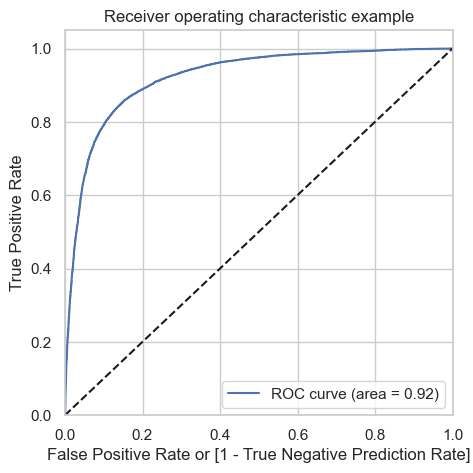

In [110]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

#### Finding Optimal Cutoff Point


In [111]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.08,0,1,0,0,0,0,0,0,0,0,0
1,0,0.45,0,1,1,1,1,1,0,0,0,0,0
2,0,0.25,0,1,1,1,0,0,0,0,0,0,0
3,0,0.46,0,1,1,1,1,1,0,0,0,0,0
4,0,0.54,1,1,1,1,1,1,1,0,0,0,0


In [112]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

              probability             accuracy          sensitivity  \
0.00                 0.00                 0.50                 1.00   
0.10                 0.10                 0.71                 0.98   
0.20                 0.20                 0.78                 0.96   
0.30                 0.30                 0.82                 0.94   
0.40                 0.40                 0.84                 0.90   
0.50                 0.50                 0.85                 0.86   
0.60                 0.60                 0.85                 0.81   
0.70                 0.70                 0.83                 0.73   
0.80                 0.80                 0.78                 0.61   
0.90                 0.90                 0.67                 0.36   

              specificity  
0.00                 0.00  
0.10                 0.44  
0.20                 0.59  
0.30                 0.70  
0.40                 0.78  
0.50                 0.84  
0.60                 0

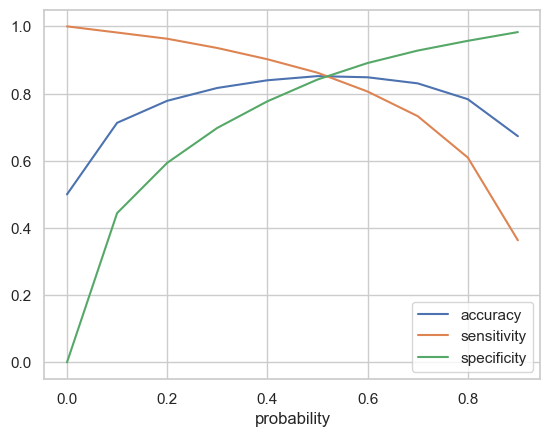

In [113]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**Initially we selected the optimm point of classification as 0.5.<br><br>From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. So lets tweek a little more within this range.**

In [114]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.45,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.25,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.46,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.54,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0


In [115]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

              probability             accuracy          sensitivity  \
0.50                 0.50                 0.85                 0.86   
0.51                 0.51                 0.85                 0.86   
0.52                 0.52                 0.85                 0.85   
0.53                 0.53                 0.85                 0.85   
0.54                 0.54                 0.85                 0.84   
0.55                 0.55                 0.85                 0.84   
0.56                 0.56                 0.85                 0.83   
0.57                 0.57                 0.85                 0.82   
0.58                 0.58                 0.85                 0.82   
0.59                 0.59                 0.85                 0.81   

              specificity  
0.50                 0.84  
0.51                 0.85  
0.52                 0.85  
0.53                 0.86  
0.54                 0.86  
0.55                 0.87  
0.56                 0

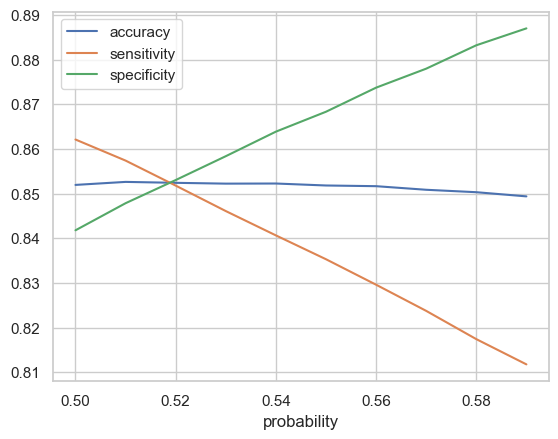

In [116]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at `0.54`**

In [117]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.54 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.45,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.25,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.46,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.54,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1


In [118]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8522397345499793


In [119]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[16662  2626]
 [ 3074 16214]]


In [120]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8406262961426794
Specificity =  0.8638531729572791
False Positive Rate =  0.13614682704272085
Precision =  0.8606157112526539
True Negative Prediction Rate =  0.8442440210782327


#### Precision and recall tradeoff

In [121]:
from sklearn.metrics import precision_recall_curve

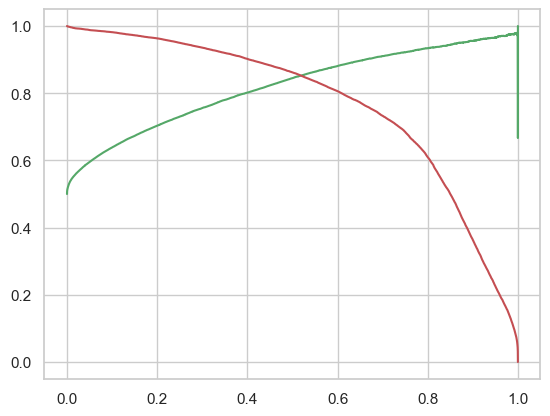

In [122]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

**Transforming and feature selection for test data**

In [123]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,...,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
35865,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.02,0.05,0.01,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.01,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.06,0,0,0,1,0,0,1,0,0,0
41952,0.05,0.01,0.01,0.00,0.01,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.00,0.01,0.02,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.03,0.05,0.02,0.00,0.01,...,0.01,0.00,0.01,0.04,0.02,0.05,0.04,0.03,0.05,0.02,0.01,0.02,0.10,0.09,0.09,0.04,0.00,0.00,0.00,0.00,0.03,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.07,0.06,0.03,0.00,0.00,0.02,0.06,0.00,0.01,0.01,0.00,0.08,1,0,0,1,0,0,0,0,1,0
98938,0.06,0.00,0.04,0.01,0.01,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.01,0.02,0.05,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.07,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.05,0.02,0.02,0.03,0.05,0.06,0.24,...,0.00,0.00,0.02,0.08,0.04,0.06,0.06,0.06,0.06,0.01,0.03,0.04,0.16,0.16,0.16,0.12,0.01,0.03,0.06,0.04,0.03,0.05,0.00,0.00,0.00,0.00,0.00,0.14,0.07,0.12,0.00,0.00,0.00,0.21,0.09,0.07,0.02,0.02,0.02,0.10,1,0,0,1,0,0,0,0,0,0
29459,0.04,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.03,0.01,0.02,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.03,0.07,0.03,0.04,0.04,0.03,0.04,0.00,0.03,0.05,0.12,0.12,0.10,0.06,0.00,0.00,0.01,0.04,0.05,0.03,0.25,0.00,0.20,0.00,0.06,0.07,0.07,0.00,0.00,0.00,0.00,0.07,0.05,0.03,0.01,0.02,0.01,0.07,1,0,0,1,0,0,1,0,0,0
70682,0.10,0.01,0.01,0.04,0.08,0.24,0.14,0.00,0.00,0.00,0.00,0.11,0.03,0.00,0.01,0.00,0.01,0.06,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.04,0.02,0.08,0.00,0.00,0.00,0.08,0.17,0.14,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.07,0.20,0.16,0.00,0.01,0.01,0.03,0.11,...,0.00,0.00,0.02,0.11,0.06,0.03,0.03,0.03,0.03,0.00,0.03,0.02,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

In [124]:
# Feature selection
X_test=X_test[rfe_columns_2]
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_mou_8,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_7,isd_og_mou_6,spl_og_mou_8,og_others_6,total_og_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_8,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_7,total_rech_num_7,total_rech_num_8,max_rech_amt_7,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_3g_6,sachet_3g_7,aug_vbc_3g,avg_arpu_6_7,total_rech_data_group_8_10-25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges
35865,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.05,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0,1,0,0
41952,0.05,0.01,0.01,0.00,0.01,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.02,0.01,0.01,0.02,0.04,0.00,0.00,0.02,0.01,0.00,0.01,0.04,0.02,0.04,0.02,0.01,0.02,0.10,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.02,0.08,0,1,0,0
98938,0.06,0.00,0.04,0.01,0.01,0.03,0.02,0.00,0.00,0.00,0.00,0.01,0.07,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.06,0.24,0.00,0.06,0.18,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.08,0.04,0.06,0.01,0.03,0.04,0.16,0.12,0.01,0.03,0.06,0.00,0.00,0.00,0.00,0.00,0.21,0.10,0,1,0,0
29459,0.04,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.07,0.03,0.04,0.00,0.03,0.05,0.12,0.06,0.00,0.00,0.01,0.25,0.00,0.20,0.00,0.00,0.07,0.07,0,1,0,0
70682,0.10,0.01,0.01,0.04,0.08,0.24,0.14,0.00,0.00,0.11,0.03,0.00,0.04,0.00,0.00,0.00,0.02,0.00,0.00,0.17,0.00,0.00,0.00,0.16,0.03,0.11,0.00,0.02,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.00,0.11,0.06,0.03,0.00,0.03,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0,0,1,0


In [125]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

**Predicting the target variable**

In [126]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 35865                   0.75
41952                   0.51
98938                   0.00
29459                   0.12
70682                   0.02
58317                   0.20
4860                    0.00
16890                   0.86
61329                   0.52
94332                   0.58
dtype: float64


In [127]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
35865,0.75
41952,0.51
98938,0.00
29459,0.12
70682,0.02


In [128]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [129]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
35865,0
41952,0
98938,0
29459,0
70682,0


In [130]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
35865,0,0.75
41952,0,0.51
98938,0,0.00
29459,0,0.12
70682,0,0.02


In [131]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
35865,0,0.75,1
41952,0,0.51,0
98938,0,0.00,0
29459,0,0.12,0
70682,0,0.02,0


In [132]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.8534607265859349

**Metrics Evaluation**

In [133]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[7099 1173]
 [ 146  583]]


In [134]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [135]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.7997256515775034
Specificity =  0.8581963249516441
False Positive Rate =  0.1418036750483559
Precision =  0.332004555808656
True Negative Prediction Rate =  0.979848171152519


### Explaining the results

In [136]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

The accuracy of the predicted model is:  85.0 %
The sensitivity of the predicted model is:  80.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



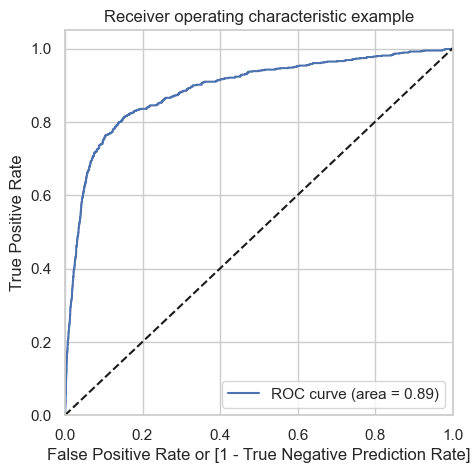

In [137]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

**The AUC score for train dataset is 0.90 and the test dataset is 0.87.<br> This model can be considered as a good model.**

<br>

#### Logistic Regression using PCA

In [138]:
# split the dateset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

# apply scaling on the dataset

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

# Applying SMOTE technique for data imbalance correction

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()

Dimension of X_train: (21000, 126)
Dimension of X_test: (9001, 126)
Dimension of X_train_sm Shape: (38576, 126)
Dimension of y_train_sm Shape: (38576,)


,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,...,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.02,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,...,0.00,0.00,0.01,0.05,0.02,0.04,0.04,0.03,0.04,0.04,0.03,0.02,0.10,0.10,0.10,0.04,0.00,0.03,0.02,0.00,0.00,0.00,0.25,0.25,0.20,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.06,1,0,0,1,0,0,0,0,0,0
1,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.04,0.02,...,0.00,0.00,0.06,0.11,0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.11,0.02,0.02,0.02,0.03,0.06,0.05,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.08,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.07,1,0,0,1,0,0,0,0,1,0
2,0.03,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.04,0.03,...,0.00,0.00,0.06,0.11,0.06,0.01,0.04,0.00,0.00,0.04,0.00,0.04,0.02,0.10,0.01,0.01,0.07,0.09,0.05,0.00,0.00,0.00,0.00,0.50,0.00,0.26,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.03,0.02,0.07,1,0,0,0,1,0,1,0,0,0
3,0.08,0.16,0.11,0.05,0.14,0.18,0.05,0.00,0.03,0.00,0.00,0.38,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.14,0.00,0.00,0.00,0.27,0.16,0.08,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.23,0.16,0.09,0.01,0.00,0.01,0.01,0.01,...,0.00,0.00,0.02,0.07,0.03,0.14,0.08,0.09,0.14,0.08,0.09,0.02,0.00,0.16,0.16,0.06,0.00,0.09,0.00,0.00,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.06,0.00,0.00,0.00,0.01,0.21,0.00,0.01,0.04,0.02,0.15,1,0,0,1,0,0,0,0,1,0
4,0.04,0.08,0.05,0.00,0.06,0.05,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.02,0.00,0.06,0.09,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.07,0.01,0.02,0.02,0.00,0.00,0.07,0.03,0.00,0.00,0.03,0.03,0.01,0.07,0.00,0.00,0.10,0.08,0.01,0.00,0.00,0.00,0.04,0.11,...,0.00,0.00,0.06,0.12,0.06,0.02,0.03,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.09,0

In [139]:
# importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [140]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (38576, 126)
Dimension of X_test_pca:  (9001, 126)


In [141]:
#Viewing the PCA components
pca.components_

array([[ 1.77080250e-02,  5.62945551e-03,  1.28071557e-02, ...,
        -8.33377373e-02,  2.03169293e-01, -2.25884463e-04],
       [ 1.17884332e-03,  1.36226801e-04,  2.66567649e-03, ...,
         6.62002105e-01, -7.17541378e-01,  1.93966990e-04],
       [ 8.31908962e-03, -2.32698646e-02, -1.53378013e-02, ...,
         7.54642802e-02,  5.50287343e-02,  1.26734621e-03],
       ...,
       [-3.94307291e-07,  1.32661563e-06, -2.21287989e-06, ...,
        -3.76725866e-08, -1.42403278e-08,  2.74517957e-08],
       [ 2.29473384e-07, -1.88640723e-06,  1.53383133e-06, ...,
        -3.64244932e-08, -2.71775061e-08, -3.24942342e-08],
       [-0.00000000e+00,  9.15847248e-16, -8.10568734e-17, ...,
         4.98183097e-18, -1.72387817e-18,  2.71033762e-18]])

#### Performing Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_sm_pca, y_train_sm)

# making the predictions
y_pred = logreg_pca.predict(X_test_pca)

# converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred)
print("Dimension of y_pred_df:", y_pred_df.shape)

Dimension of y_pred_df: (9001, 1)


In [143]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[6760 1512]
 [ 127  602]] 

Accuracy of the logistic regression model with PCA:  0.8179091212087546


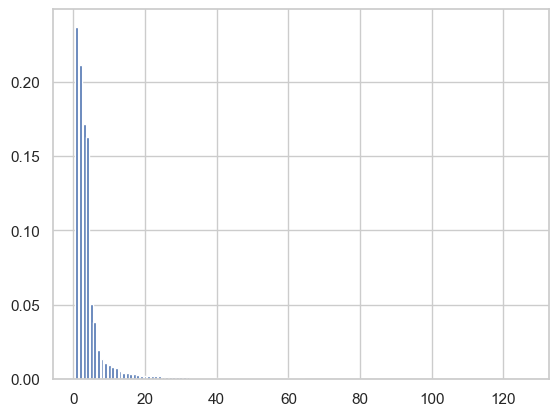

In [144]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

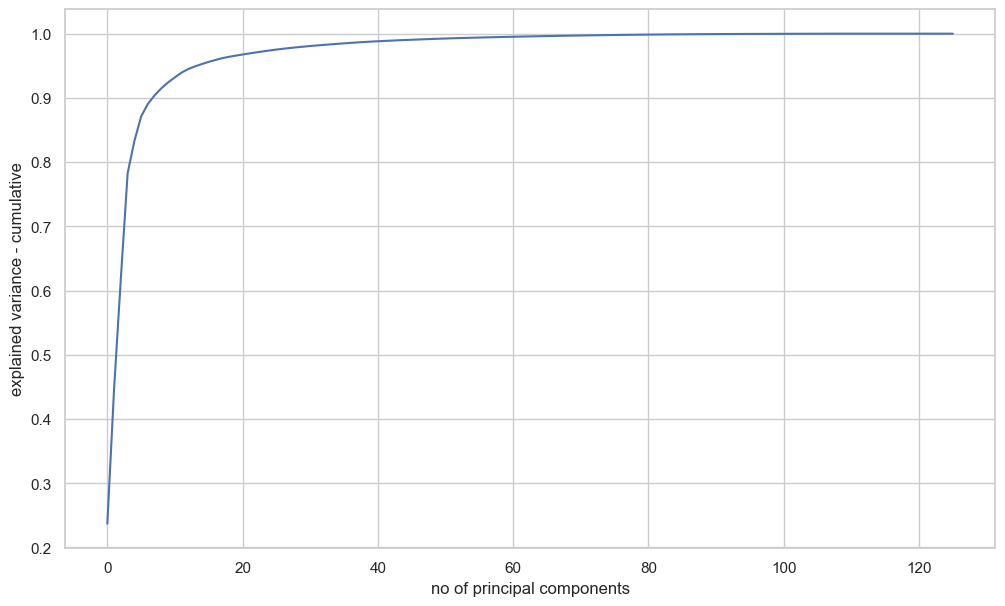

In [145]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot
fig = plt.figure(figsize=[12,7])
plt.plot(var_cumu)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [146]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([23.7, 44.8, 62. , 78.3, 83.3, 87.1, 89. , 90.4, 91.5, 92.4, 93.2,
       93.9, 94.5, 94.9, 95.3, 95.6, 95.9, 96.2, 96.4, 96.6, 96.8, 97. ,
       97.2, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9, 98. , 98.1, 98.2, 98.3,
       98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. , 99.1, 99.2, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3])

 **90% of the data can be explained with 8 PCA components*

**Fitting the dataset with the 8 explainable components**

In [147]:
pca_8 = PCA(n_components=15)

train_pca_8 = pca_8.fit_transform(X_train_sm)
print("Dimension for Train dataset using PCA: ", train_pca_8.shape)

test_pca_8 = pca_8.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_8.shape)

Dimension for Train dataset using PCA:  (38576, 15)
Dimension for Test dataset using PCA:  (9001, 15)


In [148]:
logreg_pca_8 = LogisticRegression()
logreg_pca_8.fit(train_pca_8, y_train_sm)

# making the predictions
y_pred_8 = logreg_pca_8.predict(test_pca_8)

# converting the prediction into a dataframe
y_pred_df_8 = pd.DataFrame(y_pred_8)
print("Dimension of y_pred_df_8: ", y_pred_df_8.shape)

Dimension of y_pred_df_8:  (9001, 1)


In [149]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred_8),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred_8))

Confusion Matirx for y_test & y_pred
 [[6249 2023]
 [ 185  544]] 

Accuracy of the logistic regression model with PCA:  0.7546939228974558


In [150]:
# df_pca = pd.DataFrame(newdata, columns=["PC1", "PC2"])
# df.head()